# Advanced Lane Lines



In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import moviepy
%matplotlib inline

## Calibration and Distortion

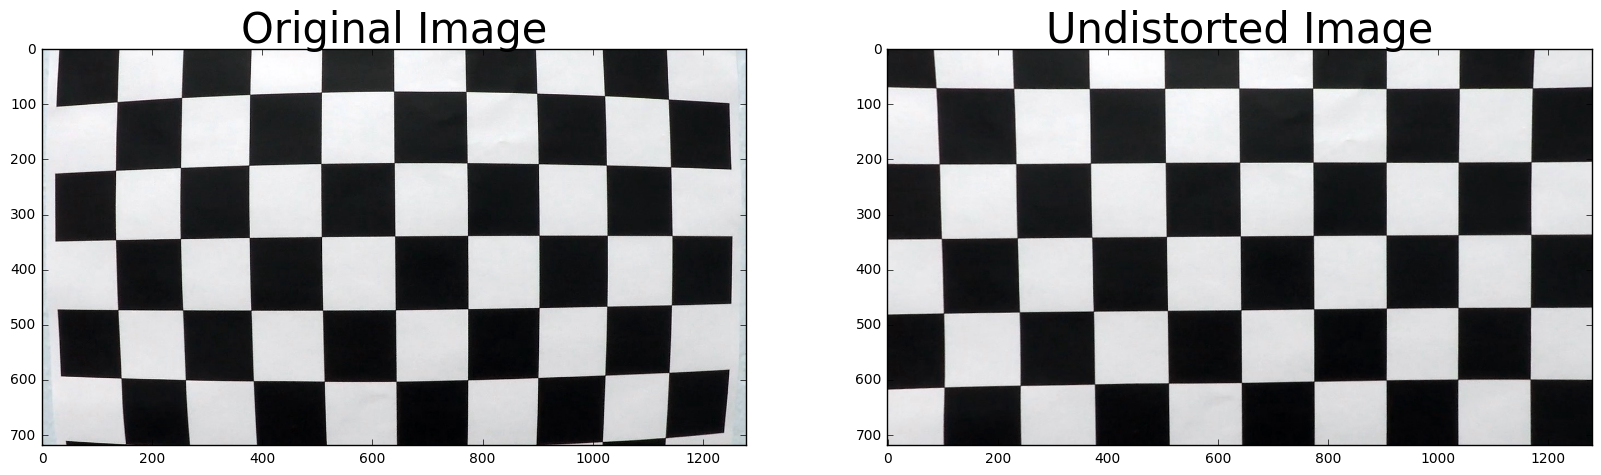

In [61]:
import glob

# Code adapted from https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb

# Setup board size
nx = 6
ny = 9

# Initialize object points
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:ny, 0:nx].T.reshape(-1,2)

objpoints = []
imgpoints = []

# Find image points for each image
images = glob.glob('camera_cal/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (ny,nx), None)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # plt.figure()
        # cv2.drawChessboardCorners(img, (ny,nx), corners, ret)
        # plt.imshow(img)
        
# Calculate the transform matrix, and test in on the first calibration image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Function calibrated to undistort images.
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

dst = undistort(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Perspective Transform

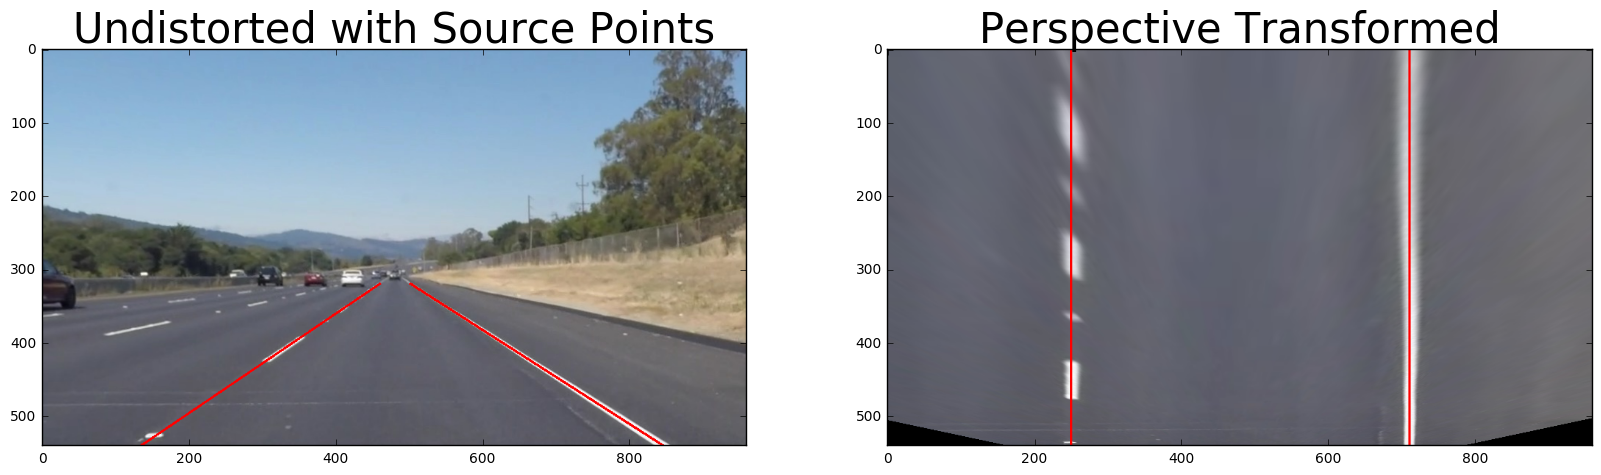

In [62]:
img = undistort(mpimg.imread('test_images/solidWhiteRight.jpg'))

# 540 x 960

# Source Points
tl = (460, 320)
bl = (135, 540)
tr = (501, 320)
br = (845, 540)

# Overhead Lines
t_tl = (250, -540)
t_bl = (250, 540)
t_tr = (710, -540)
t_br = (710, 540)

# Get perspective transform matrices
M = cv2.getPerspectiveTransform(
    np.float32((tl, bl, tr, br)),
    np.float32((t_tl, t_bl, t_tr, t_br))
)
Minv = cv2.getPerspectiveTransform(
    np.float32((tl, bl, tr, br)),
    np.float32((t_tl, t_bl, t_tr, t_br))
)

def warp_perspective(img):
    """Warp the image to an overhead view"""
    return cv2.warpPerspective(img, M, (960, 540), flags=cv2.INTER_LINEAR)

def unwarp_perspective(img):
    """Unwarp the image from an overhead view"""
    return cv2.warpPerspective(img, Minv, (960, 540), flags=cv2.INTER_LINEAR)

warped = warp_perspective(img)

# Draw source and overhead point lines on images
cv2.line(img, bl, tl, color=(255,0,0), thickness=2)
cv2.line(img, br, tr, color=(255,0,0), thickness=2)
cv2.line(warped, t_bl, t_tl, color=(255,0,0), thickness=2)
cv2.line(warped, t_br, t_tr, color=(255,0,0), thickness=2)

# Show the original image and perspective transformed
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Undistorted with Source Points', fontsize=30)
ax2.imshow(warped)
ax2.set_title('Perspective Transformed', fontsize=30)